<h1 align="center">Plotting and Annotating the War on Poverty</h1> 

The other day, I was listening to the [Contra Krugman](https://contrakrugman.com/) episode entitled ["How to Unwind the Welfare State"](https://contrakrugman.com/ep-149-how-to-unwind-the-welfare-state/).  Toward the end of the discussion, the hosts began listing examples of private organizations in the free market solving social problems only to be stymied when the federal government began to insert itself into the situation.  Host Bob Murphy referenced an article he wrote for [FEE](https://fee.org/) where he discussed how, in the 1950s and 60s, the free market was already lifting people out of poverty at a pretty good clip just to have Lyndon Johnson and the federal government jump on the bandwagon halfway through and claim that it was their legislation, not the free market, that did all the heavy lifting.

I couldn't find the article Bob was referencing (maybe it was [this](https://fee.org/media/4513/murphy0404.pdf)?); nevertheless, it occurred to me this might be an opportunity to improve my [matplotlib](https://matplotlib.org/index.html) skills.  Maybe I could find the official US poverty numbers, plot them out, then annotate the plot with markers indicating when key legislation in the War on Poverty was enacted.  Would this convey the point Bob was making?  Let's find out!

### Step 1: Load the packages I'll need to do the work

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

%matplotlib inline
plt.style.use('fivethirtyeight')

### Step 2: Get the data

I downloaded the ["Poverty of People, by Region"](https://www2.census.gov/programs-surveys/cps/tables/time-series/historical-poverty-people/hstpov9.xls) from the [US Census page](https://www.census.gov/en.html), [Historical Poverty Tables: People and Families - 1959 to 2016](https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-poverty-people.html).

### Step 3: Read in the spreadsheet
Take a look at that spreadsheet!  The first three rows need to be skipped as they're just titles for the data.  The header itself is a little crazy: it's a three-level (multi-level) header!  Just figuring out how to read that sucker into a dataframe was challenging enough!

In [2]:
df_pov = pd.read_excel('./hstpov9.xls', header=[3,4,5], index_col=0)
df_pov = df_pov[:-1]  # drop the last row as it's just a footnote

In [3]:
df_pov.head()

Year                   Total                                Northeast  \
                       Total Below poverty                      Total   
          Unnamed: 1_level_2        Number Percent Unnamed: 4_level_2   
2016                319911.0       40616.0    12.7              55470   
2015                318454.0       43123.0    13.5              55779   
2014                315804.0       46657.0    14.8              55725   
2013 (19)           313096.0       46269.0    14.8              55529   
2013 (18)           312965.0       45318.0    14.5              55478   

Year                                       Midwest                        \
          Below poverty                      Total Below poverty           
                 Number Percent Unnamed: 7_level_2        Number Percent   
2016               5969    10.8              66897          7809    11.7   
2015               6891    12.4              67030          7849    11.7   
2014               7020    12.6              67130          8714      13   
2013 (19)          7205      13              66732          9269    13.9   
2013 (18)          7046    12.7              66785          8590    12.9   

Year                    South                                      West  \
                        Total Below poverty                       Total   
          Unnamed: 10_level_2        Number Percent Unnamed: 13_level_2   
2016                   121166         17028    14.1               76377   
2015                   119955         18305    15.3               75690   
2014                   118193         19531    16.5               74756   
2013 (19)              116956         19040    16.3               73879   
2013 (18)              116961         18870    16.1               73742   

Year                             
          Below poverty          
                 Number Percent  
2016               9810    12.8  
2015              10079    13.3  
2014              11391    15.2  
2013 (19)         10754    14.6  
2013 (18)         10812    14.7

In [4]:
df_pov.tail()

Year                   Total                                Northeast  \
                       Total Below poverty                      Total   
          Unnamed: 1_level_2        Number Percent Unnamed: 4_level_2   
1971 (2 )           204554.0       25559.0    12.5              48584   
1970                202183.0       25420.0    12.6               (NA)   
1969                199517.0       24147.0    12.1              47597   
1960                179503.0       39851.0    22.2               (NA)   
1959                176557.0       39490.0    22.4               (NA)   

Year                                       Midwest                        \
          Below poverty                      Total Below poverty           
                 Number Percent Unnamed: 7_level_2        Number Percent   
1971 (2 )          4512     9.3              56107          5764    10.3   
1970               (NA)    (NA)               (NA)          (NA)    (NA)   
1969               4108     8.6              56286          5424     9.6   
1960               (NA)    (NA)               (NA)          (NA)    (NA)   
1959               (NA)    (NA)               (NA)          (NA)    (NA)   

Year                    South                                      West  \
                        Total Below poverty                       Total   
          Unnamed: 10_level_2        Number Percent Unnamed: 13_level_2   
1971 (2 )               63746         11182    17.5               36116   
1970                    61890         11480    18.5                (NA)   
1969                    61825         11090    17.9               33809   
1960                     (NA)          (NA)    (NA)                (NA)   
1959                    53941         19116    35.4                (NA)   

Year                             
          Below poverty          
                 Number Percent  
1971 (2 )          4101    11.4  
1970               (NA)    (NA)  
1969               3525    10.4  
1960               (NA)    (NA)  
1959               (NA)    (NA)

Also, take a look at the years 2013, 2010, 2004, etc.  They have paranthetic footnotes after them.  That's not going to help me when it comes to charting the data, so I need to write a few lines of code to clean that up.

In [5]:
original_index = df_pov.index.tolist()
clean_index = [int(str(i)[:4]) for i in original_index]

df_pov = df_pov.rename(index=dict(zip(original_index, clean_index)))

In [6]:
df_pov.head()

Year              Total                                Northeast  \
                  Total Below poverty                      Total   
     Unnamed: 1_level_2        Number Percent Unnamed: 4_level_2   
2016           319911.0       40616.0    12.7              55470   
2015           318454.0       43123.0    13.5              55779   
2014           315804.0       46657.0    14.8              55725   
2013           313096.0       46269.0    14.8              55529   
2013           312965.0       45318.0    14.5              55478   

Year                                  Midwest                        \
     Below poverty                      Total Below poverty           
            Number Percent Unnamed: 7_level_2        Number Percent   
2016          5969    10.8              66897          7809    11.7   
2015          6891    12.4              67030          7849    11.7   
2014          7020    12.6              67130          8714      13   
2013          7205      13              66732          9269    13.9   
2013          7046    12.7              66785          8590    12.9   

Year               South                                      West  \
                   Total Below poverty                       Total   
     Unnamed: 10_level_2        Number Percent Unnamed: 13_level_2   
2016              121166         17028    14.1               76377   
2015              119955         18305    15.3               75690   
2014              118193         19531    16.5               74756   
2013              116956         19040    16.3               73879   
2013              116961         18870    16.1               73742   

Year                        
     Below poverty          
            Number Percent  
2016          9810    12.8  
2015         10079    13.3  
2014         11391    15.2  
2013         10754    14.6  
2013         10812    14.7

In [7]:
df_pov.tail()

Year              Total                                Northeast  \
                  Total Below poverty                      Total   
     Unnamed: 1_level_2        Number Percent Unnamed: 4_level_2   
1971           204554.0       25559.0    12.5              48584   
1970           202183.0       25420.0    12.6               (NA)   
1969           199517.0       24147.0    12.1              47597   
1960           179503.0       39851.0    22.2               (NA)   
1959           176557.0       39490.0    22.4               (NA)   

Year                                  Midwest                        \
     Below poverty                      Total Below poverty           
            Number Percent Unnamed: 7_level_2        Number Percent   
1971          4512     9.3              56107          5764    10.3   
1970          (NA)    (NA)               (NA)          (NA)    (NA)   
1969          4108     8.6              56286          5424     9.6   
1960          (NA)    (NA)               (NA)          (NA)    (NA)   
1959          (NA)    (NA)               (NA)          (NA)    (NA)   

Year               South                                      West  \
                   Total Below poverty                       Total   
     Unnamed: 10_level_2        Number Percent Unnamed: 13_level_2   
1971               63746         11182    17.5               36116   
1970               61890         11480    18.5                (NA)   
1969               61825         11090    17.9               33809   
1960                (NA)          (NA)    (NA)                (NA)   
1959               53941         19116    35.4                (NA)   

Year                        
     Below poverty          
            Number Percent  
1971          4101    11.4  
1970          (NA)    (NA)  
1969          3525    10.4  
1960          (NA)    (NA)  
1959          (NA)    (NA)

### Step 4: Build some charts
Ok.  Now I can get to the good stuff.  Let me first just try to plot out the poverty rate over time.

Text(0,0.5,'Percent below poverty')

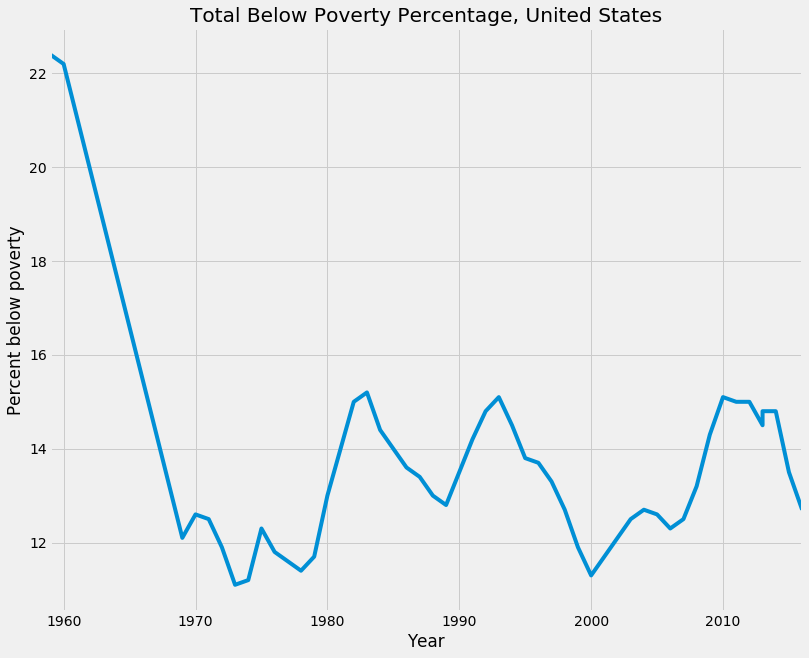

In [8]:
title = 'Total Below Poverty Percentage, United States'
ax = df_pov.sort_index().loc[:, ('Total', 'Below poverty', 'Percent')].plot(title=title, figsize=(12, 10))
ax.set_xlabel('Year')
ax.set_ylabel('Percent below poverty')

### Step 5: Get the legislation dates and fill in some missing data

Checking out the [Wikipedia page on the War on Poverty](https://en.wikipedia.org/wiki/War_on_Poverty), I see four main pieces of legislation and the dates they were signed into law:
- The Economic Opportunity Act of 1964 – August 20, 1964
- Food Stamp Act of 1964 – August 31, 1964
- Elementary and Secondary Education Act – April 11, 1965
- Social Security Act 1965 (Created Medicare and Medicaid) – July 19, 1965

So, the important War on Poverty legislation landed in 1964 and 1965.  Strangely, the US Census data that I pulled down has a big data gap between the years 1960 - 1969: the time period when the legislation was enacted.  I wonder why that data is missing?  Anyway, if I want to super-impose these years on my chart, I'll need to creatively calculate the X and Y coordinates.  Pandas [interpolate](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html) to the rescue!

In [15]:
# create a dataframe for the data I'm missing
df_gap_data = df_pov.loc[[1960, 1969], ('Total', 'Below poverty')]
# create rows for the missing data and use Pandas interpolate to make a best guess at what the poverty rate was during
# those missing years
df_gap_data = df_gap_data.reindex(pd.RangeIndex(df_gap_data.index.min(), df_gap_data.index.max() + 1)).interpolate()
df_gap_data  # take a look at what we calculated

C:\Users\brad\Anaconda3\lib\site-packages\pandas\core\indexing.py:1325: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


,Number,Percent
1960,39851.000000,22.200000
1961,38106.111111,21.077778
1962,36361.222222,19.955556
1963,34616.333333,18.833333
1964,32871.444444,17.711111
1965,31126.555556,16.588889
1966,29381.666667,15.466667
1967,27636.777778,14.344444
1968,25891.888889,13.222222
1969,24147.000000,12.100000


Now, I'm ready to re-plot a line chart of the poverty rate and add my legislation annotations on top.

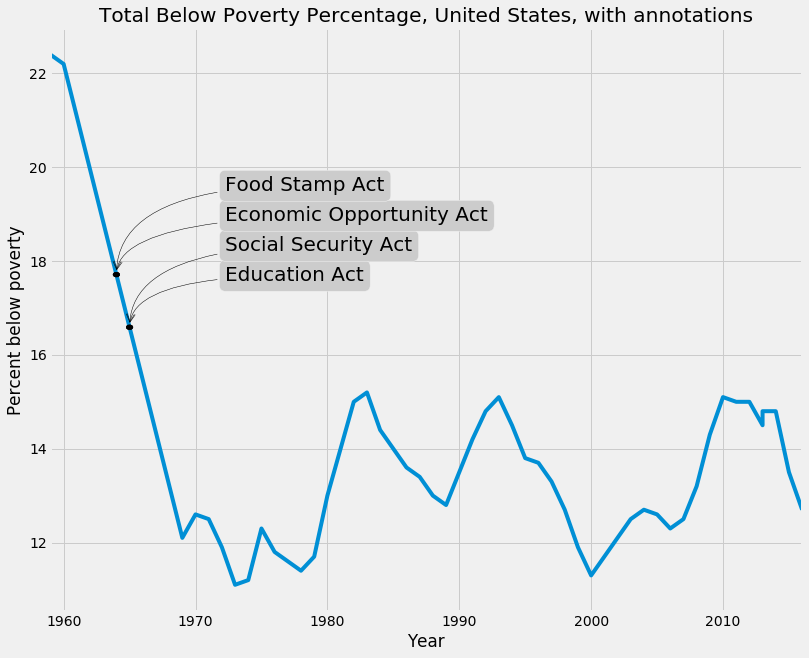

In [73]:
laws = [('Education Act', 1965), ('Social Security Act', 1965),
        ('Economic Opportunity Act', 1964), ('Food Stamp Act', 1964)]
title = 'Total Below Poverty Percentage, United States, with annotations'
y_offset = 0  # offset counter for the text block annotations

# plot the poverty rate again
ax = df_pov.sort_index().loc[:, ('Total', 'Below poverty', 'Percent')].plot(title=title, figsize=(12, 10))
ax.set_xlabel('Year')
ax.set_ylabel('Percent below poverty')

# loop through the legislation so I can add those annotations
for law in laws:
    y_offset += 30
    name, year = law
    percent = df_gap_data.loc[year, 'Percent']
    ci = Ellipse((year, percent), width=0.5, height=0.1, color='black', zorder=5)
    ax.add_patch(ci)

    ax.annotate(name,
                xy=(year, percent), xycoords='data',
                xytext=(175, 300 + y_offset), textcoords='axes points',
                size=20,
                bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops=dict(arrowstyle="->", color='black', patchB=ci,
                                connectionstyle="angle3,angleA=0,angleB=-90"))


### Conclusions
It does look like Bob had a point: the poverty rate was rapidly declining for at least five years before the arrival of the first piece of legislation.  I could only find data back to 1959, so, who knows, maybe it had been declining even longer.

The decline abruptly halts around 1969.  Was that due to government involving itself in the problem when maybe it shouldn't have?  I don't think we have sufficient data here to draw those conclusions.  Nevertheless, I think this does illustrate what Bob Murphy was talking about during the podcast.

More importantly, it was a great opportunity for me to learn how to annotate matplotlib charts!